# Monte Carlo Simulation

## methodology

We will be valuing European-style option under BSM approach. So, underlying follows GBM under risk-neutrality, with an SDE as per below

In [1]:
from IPython.display import display, Math, Latex
display(Math(r'dS_t = r S_t dt + \sigma S_t d Z_t'))
display(Math(r'Z_t \text{ - GBM process}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The above can be solved with Euler method for numerical integration of ODEs. So, Euler discretization of the above is

In [2]:
display(Math(r'S_t = S_{t-\Delta t}exp((r - \frac{1}{2} \sigma^2)\Delta t + \sigma \sqrt{\Delta t}z_t)'))
display(Math(r'\Delta t \rightarrow 0'))
display(Math(r't \in (0, T]'))
display(Math(r'z \sim \mathcal{N(0,1)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The above also can take a form of a log version of discretization

In [3]:
display(Math(r'log S_t = log S_{t-\Delta t} + (r - \frac{1}{2} \sigma^2)\Delta t + \sigma \sqrt{\Delta t}z_t'))

<IPython.core.display.Math object>

The monte carlo estimator itself looks like

In [4]:
display(Math(r'C \simeq e^{-rT} \frac{1}{N} \sum_{i=1}^{N}P(S_T^{(i)})=PV(E(\overline P))'))
display(Math(r'N - \text{number of paths}'))
display(Math(r'S_T^{(i)} - \text{terminal price for i-th path}'))
display(Math(r'P(S_T^{(i)}) = max(S_T^{(i)} - K, 0) - \text{payoff for i-th path}'))
display(Math(r'\overline P = (P(S_T^{(i)}))_{i=1}^{N}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Simulation procedure would look like
1. choose discretization level, M
2. divide T into M equal intervals, dt
3. for every dt draw z, resolve S() via discretized form of SDE
4. repeat 3. until you arrive at S(T) finally
5. derive terminal payoff
6. repeat 3.-5. N times

NB: we store paths for illustration purposes, though thats not needed to european options, as seen in intro

The benchmark, 'correct', option price can be derived via bsm call pricer

In [5]:
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2

In [6]:
from bsm_functions import bsm_call_value
bsm_call_value(S0, K, T, r, sigma)

8.021352235143176

We will be performing sims in 3 ways
- pure python, contained in `mcs_pure_python.py`
- vectorized, `mcs_vector_numpy.py`
- fully vectorized, `mcs_full_vector_numpy.py`

## Pure Python

In [7]:
%run mcs_pure_python.py

European Option Value   7.999
Duration in Seconds    36.435


the below is just another way of inititating a loop, w/out list comprehension

In [8]:
sum_val = 0.0
for path in S:
    # C-like iteration for comparison
    sum_val += max(path[-1] - K, 0)
C0 = exp(-r * T) * sum_val / I
round(C0, 3)

7.999

## Vectorization with NumPy

Vectorized form takes advantage of vector operations with numpy. Below is an illustration of how vector-scalar multiplication is treated in numpy vs pure py. Vectorized gives a boost of like x30, e.g. pseudo-random number generation is a one-liner over here.

In [9]:
v = list(range(1, 6))
print(v)

[1, 2, 3, 4, 5]


In [10]:
2 * v

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [11]:
import numpy as np
v = np.arange(1, 6)
v

array([1, 2, 3, 4, 5])

In [12]:
2 * v

array([ 2,  4,  6,  8, 10])

In [13]:
display(Math(r'2\overline v = \overline u'))

<IPython.core.display.Math object>

In [14]:
%run mcs_vector_numpy.py

European Option Value   8.020
Duration in Seconds     1.752


In [15]:
round(tpy / tnp1, 2)

20.8

## Full Vectorization

That one uses log euler scheme, so loop can be avoided completely.

In [16]:
%run mcs_full_vector_numpy.py

European Option Value   8.023
Duration in Seconds     2.054


## Charts

first 10 paths

Text(0,0.5,'S(dt)')

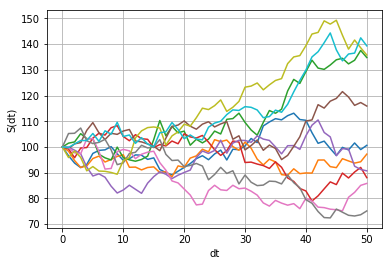

In [19]:
import matplotlib.pyplot as plt
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('dt')
plt.ylabel('S(dt)')

terminal prices' distribution

Text(0,0.5,'frequency')

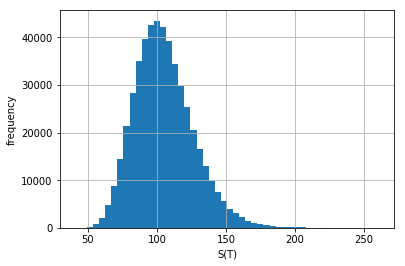

In [20]:
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('S(T)')
plt.ylabel('frequency')

payoff distribution

(0, 50000)

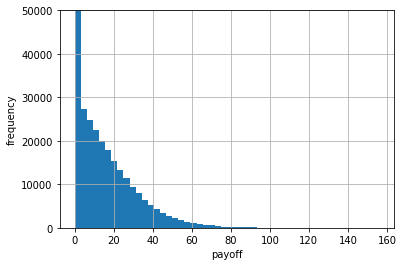

In [21]:
from numpy import maximum
plt.hist(maximum(S[-1] - K, 0), bins=50)
plt.grid(True)
plt.xlabel('payoff')
plt.ylabel('frequency')
plt.ylim(0, 50000)

In [23]:
sum(S[-1] < K)

268632